In [42]:
#https://www.kaggle.com/c/titanic/data

In [2]:
import sklearn 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
titanic_data = pd.read_csv('titanic/train.csv')

In [4]:
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
titanic_data.shape

(891, 12)

In [6]:
titanic_data.drop(['PassengerId','Name','Ticket','Cabin'], 'columns', inplace =True)
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [7]:
titanic_data[titanic_data.isnull().any(axis=1)].count()

Survived    179
Pclass      179
Sex         179
Age           2
SibSp       179
Parch       179
Fare        179
Embarked    177
dtype: int64

In [8]:
 titanic_data = titanic_data.dropna()

In [9]:
titanic_data.shape

(712, 8)

In [10]:
titanic_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


Text(0, 0.5, 'Survived')

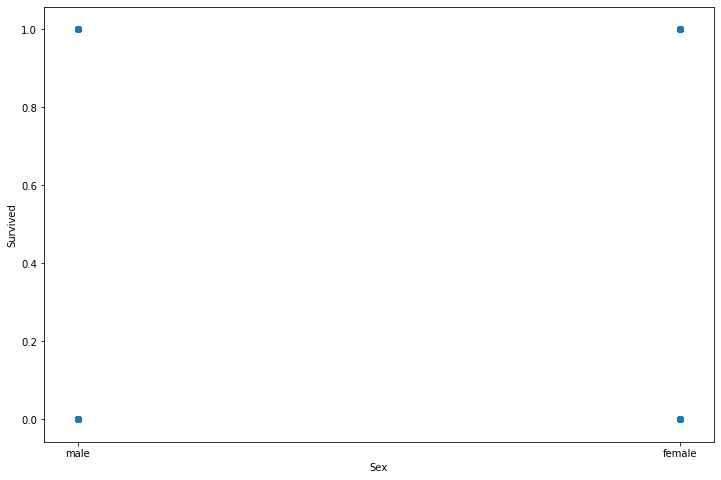

In [18]:
fig,ax = plt.subplots(figsize =(12,8))
plt.scatter(titanic_data['Sex'],titanic_data['Survived'])
plt.xlabel('Sex')
plt.ylabel('Survived')

In [19]:
pd.crosstab(titanic_data['Sex'],titanic_data['Survived'])

Survived,0,1
Sex,,
female,64,195
male,360,93


In [20]:
pd.crosstab(titanic_data['Pclass'],titanic_data['Survived'])

Survived,0,1
Pclass,,
1,64,120
2,90,83
3,270,85


In [23]:
titanic_data_corr = titanic_data.corr()
titanic_data_corr

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,1.000000,-0.356462,-0.536762,-0.082446,-0.015523,0.095265,0.266100
Pclass,-0.356462,1.000000,0.150826,-0.365902,0.065187,0.023666,-0.552893
Sex,-0.536762,0.150826,1.000000,0.099037,-0.106296,-0.249543,-0.182457
Age,-0.082446,-0.365902,0.099037,1.000000,-0.307351,-0.187896,0.093143
SibSp,-0.015523,0.065187,-0.106296,-0.307351,1.000000,0.383338,0.139860
Parch,0.095265,0.023666,-0.249543,-0.187896,0.383338,1.000000,0.206624
Fare,0.266100,-0.552893,-0.182457,0.093143,0.139860,0.206624,1.000000


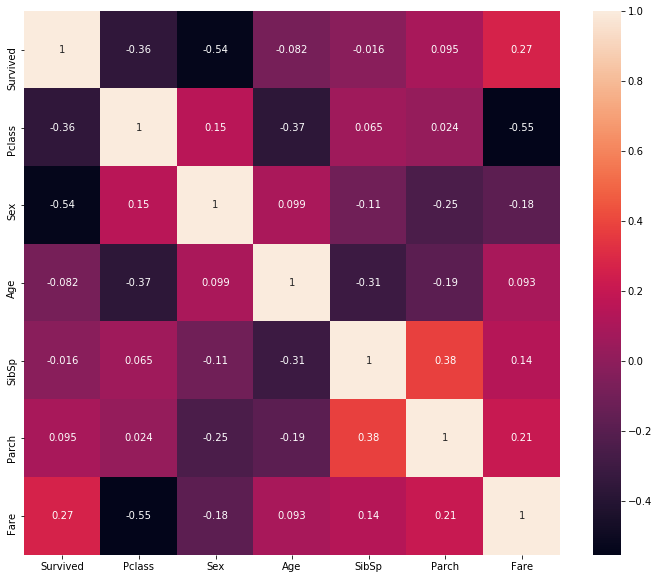

In [24]:
fig, ax = plt.subplots(figsize =(12,10))
sns.heatmap(titanic_data_corr, annot = True)

In [25]:
from sklearn import preprocessing 
label_encod = preprocessing.LabelEncoder()
titanic_data['Sex'] = label_encod.fit_transform(titanic_data['Sex'].astype(str))
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [26]:
label_encod.classes_

array(['0', '1'], dtype=object)

In [27]:
titanic_data = pd.get_dummies(titanic_data,columns= ['Embarked'])
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


In [28]:
titanic_data = titanic_data.sample(frac = 1).reset_index(drop=True)
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,1,1,36.0,0,0,26.2875,0,0,1
1,1,2,0,40.0,1,1,39.0000,0,0,1
2,0,3,0,20.0,1,0,9.8250,0,0,1
3,1,2,0,3.0,1,2,41.5792,1,0,0
4,0,3,1,10.0,3,2,27.9000,0,0,1


In [31]:
titanic_data.to_csv('/titanic_processed.csv', index = False)

In [29]:
titanic_data = pd.read_csv('git_classification/titanic/titanic_processed.csv')

In [30]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,2,1,30.0,0,0,13.0000,0,0,1
1,0,3,1,18.0,0,0,7.7750,0,0,1
2,0,2,1,25.0,0,0,13.0000,0,0,1
3,0,3,1,7.0,4,1,39.6875,0,0,1
4,0,3,1,39.0,1,5,31.2750,0,0,1


In [31]:
titanic_data.shape

(712, 10)

In [32]:
from sklearn.model_selection import train_test_split
x = titanic_data.drop('Survived', axis = 1)
y = titanic_data['Survived']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

In [33]:
x_train.shape, y_train.shape

((569, 9), (569,))

In [34]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(penalty='l2',C =1.0,solver = 'liblinear').fit(x_train,y_train)

In [35]:
y_pred = logistic_model.predict(x_test)

In [36]:
pred_results = pd.DataFrame({'y_test':y_test,
                             'y_pred':y_pred})

In [37]:
pred_results.head(10)

,y_test,y_pred
254,0,1
607,0,1
344,0,0
149,0,0
241,0,1
176,1,1
8,0,0
24,1,0
27,0,0
552,0,0


In [38]:
titanic_crosstab = pd.crosstab(pred_results.y_pred, pred_results.y_test)
titanic_crosstab

y_test,0,1
y_pred,,
0,76,21
1,12,34


In [39]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score 

In [41]:
acc = accuracy_score(y_test,y_pred)
prec= precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
print('accuracy score : ', acc)
print('precision score : ', prec)
print('recall score : ', recall)

accuracy score :  0.7692307692307693
precision score :  0.7391304347826086
recall score :  0.6181818181818182
